In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Confusion Matrix

## 1.Get the MNIST data using fetch_openml. Since the data is already shuffled, take the first 30,000 elements as your train dataset.

1. get the MNIST data.

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

since the data is already shuffled take the first 30000 elements as your train dataset.


In [7]:
X_used, y_used = mnist.data[:37500], mnist.target[:37500]
y_used

array(['5', '0', '4', ..., '0', '9', '1'], dtype=object)

In [8]:
y_used.astype(int)

array([5, 0, 4, ..., 0, 9, 1])

In [9]:
print((X_used.shape,y_used.shape))

((37500, 784), (37500,))


## **train-test data split**

In [10]:
# train_set: test_set = 80%: 20%
X_train, X_test, y_train, y_test = X_used[:30000], X_used[30000:], y_used[:30000], y_used[30000:]

In [11]:
X_train[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   

In [12]:
print((X_train.shape,X_test.shape, y_train.shape,y_test.shape))

((30000, 784), (7500, 784), (30000,), (7500,))


Use the SGD classifier of Scikitlearn to classify the digits, the random state is set for the sake of reproducibility.

In [13]:
# data with no processing at all
from sklearn.linear_model import SGDClassifier
clf_raw = SGDClassifier(random_state=42)
clf_raw.fit(X_train.astype("float64"), y_train)
y_pred_raw = clf_raw.predict(X_test.astype("float64"))
acc_raw = accuracy_score(y_test, y_pred_raw)
print("No preprocessing accuracy:", acc_raw)

No preprocessing accuracy: 0.8565333333333334


## 2. Use the provided code to preprocess the data and train your model.

In [14]:
# StandardScaler processing data
from sklearn.preprocessing import StandardScaler#------ fill this line

scaler = StandardScaler()#------ fill this line
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))#------ fill this line use astype("float64")
X_test_scaled = scaler.transform(X_test.astype("float64"))


clf_std = SGDClassifier(random_state=42)
clf_std.fit(X_train_scaled, y_train)
y_pred_std = clf_std.predict(X_test_scaled)
acc_std = accuracy_score(y_test, y_pred_std)
print("StandardScaler accuracy:", acc_std)

StandardScaler accuracy: 0.8977333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [15]:
# minmax processing data
from sklearn.preprocessing import MinMaxScaler
mmscalar = MinMaxScaler()
X_train_mmscaled = mmscalar.fit_transform(X_train.astype("float64"))
X_test_mmscaled = mmscalar.transform(X_test.astype("float64"))

clf_mm = SGDClassifier(random_state=42)
clf_mm.fit(X_train_mmscaled, y_train)
y_pred_mm = clf_mm.predict(X_test_mmscaled)
acc_mm = accuracy_score(y_test, y_pred_mm)
print("MinMaxScaler accuracy:", acc_mm)

MinMaxScaler accuracy: 0.9030666666666667


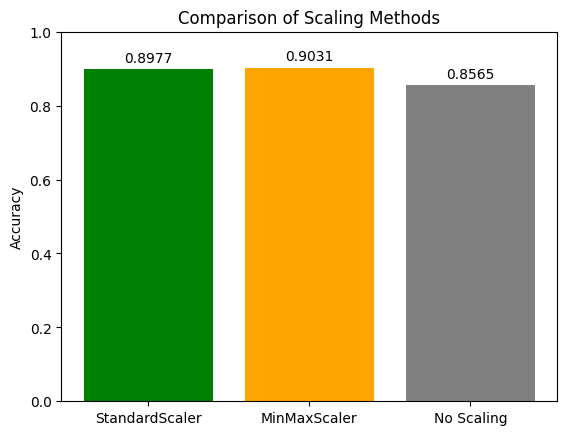

In [16]:
# compare 3 different classifiers' accuracy on same test data
import matplotlib.pyplot as plt

methods = ['StandardScaler', 'MinMaxScaler', 'No Scaling']
accuracies = [acc_std, acc_mm, acc_raw]

plt.bar(methods, accuracies, color=['green', 'orange', 'gray'])

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom')

plt.ylabel("Accuracy")
plt.title("Comparison of Scaling Methods")
plt.ylim(0, 1)
plt.show()

## 3. Make a colored diagram of the confusion matrix using ConfusionMatrixDisplay. Explain the result. Which numbers are getting misclassified? Is there any specific correlation between any 2 digits?

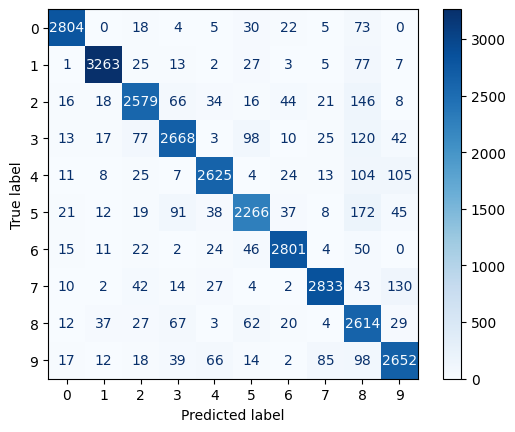

In [28]:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_train_pred = cross_val_predict(clf_std, X_train_scaled, y_train, cv=3)

cm = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)#----- fill here
disp.plot(cmap='Blues')
plt.show()

## 4. Normalize the confusion matrix by dividing each value by the total number of images in the corresponding (true) class. 

<Figure size 800x600 with 0 Axes>

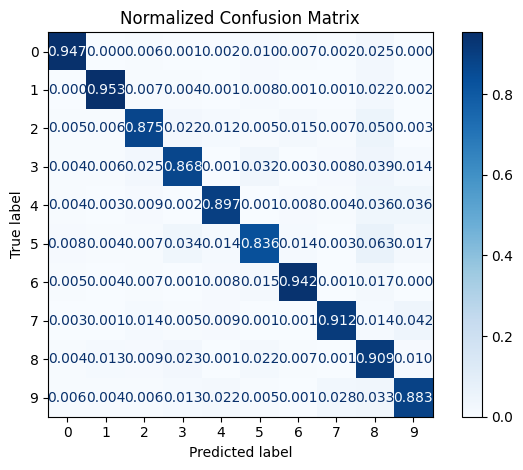

In [29]:
plt.figure(figsize=(8, 6))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        cmap='Blues', normalize='true',
                                        values_format='.3f')#----- fill here
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.show()

## 5. Make the errors more significant and put zero weight on the correct predictions.

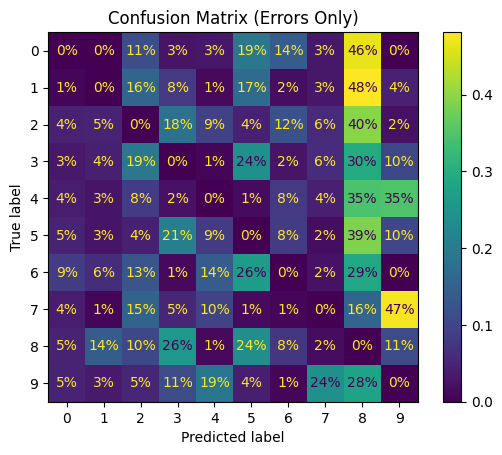

In [31]:

sample_weight = (y_train_pred != y_train)

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred,
    sample_weight=sample_weight,  #------ fill here,
    normalize="true",
    values_format=".0%"
)
plt.title("Confusion Matrix (Errors Only)")
plt.show()